# Bollinger Bands Trading (Simplified)

If the current price is ever above the upper band, short the stock. Otherwise, go long on the stock.

In [2]:
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
plt.rcParams['font.size'] = 20

In [3]:
start = '2015-01-01'
end = '2017-01-01'

# Johnson and Johnson
jnj = quandl.get('WIKI/JNJ', start_date=start, end_date=end)

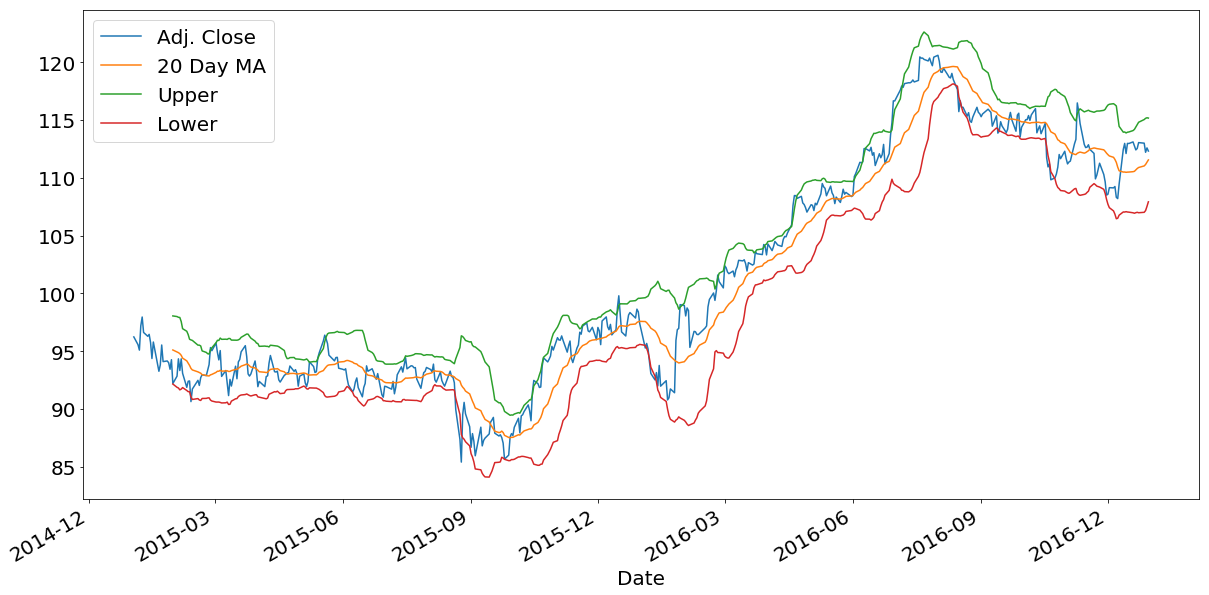

In [6]:
jnj['20 Day MA'] = jnj['Adj. Close'].rolling(20).mean()

# Upper band
jnj['Upper'] = jnj['20 Day MA'] + 2 * jnj['Adj. Close'].rolling(20).std()

# Lower band
jnj['Lower'] = jnj['20 Day MA'] - 2 * jnj['Adj. Close'].rolling(20).std()

jnj[[
    'Adj. Close',
    '20 Day MA',
    'Upper',
    'Lower',
]].plot(figsize=(20, 10));

## Trading Algorithm

In [ ]:
def initialize(context):
    context.jnj = sid(4151)
    schedule_function(check_bands, date_rules.every_day())
    
    
def check_bands(context, data):    
    current_price = data.current(context.jnj, 'price')
    
    # Load historical data for the stocks
    prices = data.history(context.jnj,'price', 20, '1d')
    
    avg = prices.mean()
    std = prices.std()
    lower_band = avg - 2*std
    upper_band = avg + 2*std
    
    if cur_price <= lower_band:
        order_target_percent(context.jnj, 1.0)
        print('Buying')
        print('Current price is: ', cur_price)
        print("Lower band is: ", lower_band)
                
    elif cur_price >= upper_band:
        order_target_percent(context.jnj, -1.0)
        print('Shorting')
        print('Current price is: ', cur_price)
        print("Upper band is: ", upper_band)

        
    record(
        upper=upper_band,
        lower=lower_band,
        sma20=avg,
        price=current_price
    )